# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;














# Análisis del Gimnasio Model Fitness para retener a sus cliente y reducir la tasa de abandono ( churn ).

## Descargar los datos

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [53]:
#descargando la base de datos
df = pd.read_csv('/datasets/gym_churn_us.csv')

df.head ()
df.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [54]:
#revisar los valores nulos

print(df.duplicated().sum())




0


## Analisis Exploratorio de Datos EDA

In [55]:
#Estadísticas descriptivas
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [56]:
#Agrupalos datos en función de la cancelación:
df.groupby('Churn').mean()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Factores que parecen reducir la cancelación:
    Vivir cerca del gimnasio.
    Tener amigos o colegas inscritos.
    Tener contratos más largos.
    Participar en visitas grupales.
    Invertir más en el gimnasio.
    Asistir con regularidad a clases.
    
Factores de riesgo de cancelación:
    Contratos cortos.
    Baja asistencia a clases, especialmente en el último mes.
    Edad más joven.
    No participar en visitas grupales.


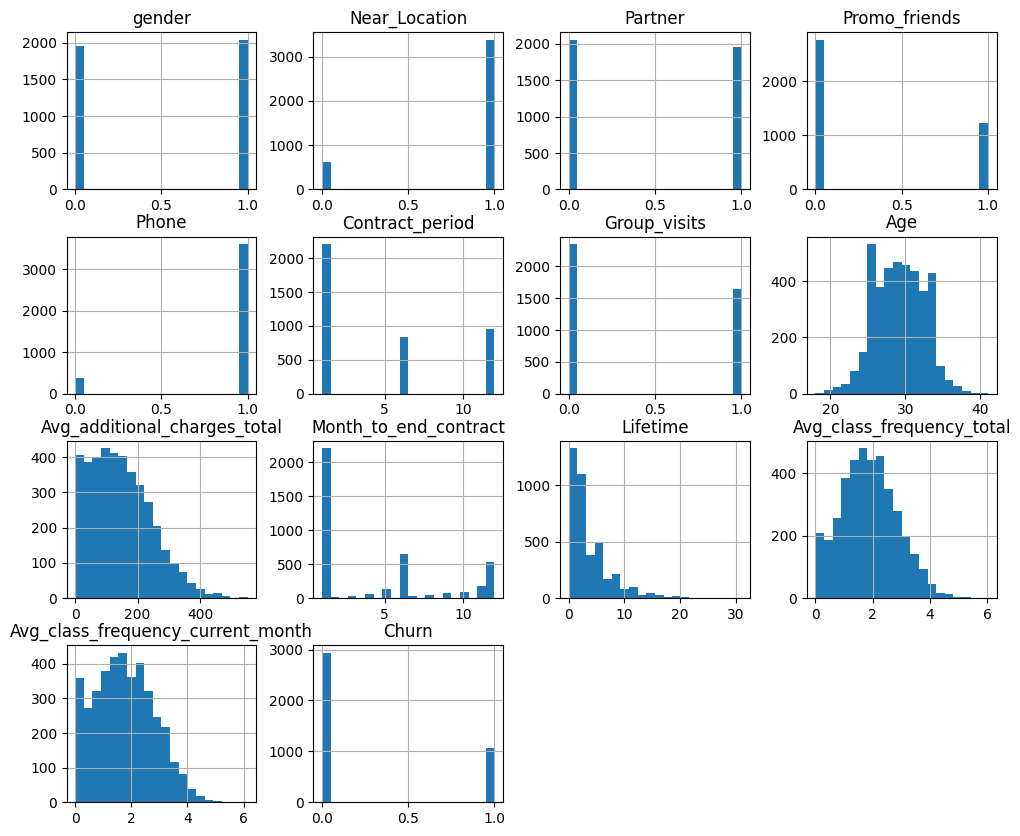

In [57]:
#Histogramas
df.hist(figsize=(12, 10), bins=20)
plt.show()

Los datos indican que los clientes con contratos cortos, baja frecuencia de clases y menor antigüedad tienen mayor riesgo de cancelación.
Las visitas grupales y las promociones con amigos son poco utilizadas, pero podrían tener un impacto positivo en la retención.
La mayoría de los clientes son jóvenes (~29 años) y gastan poco en servicios adicionales.

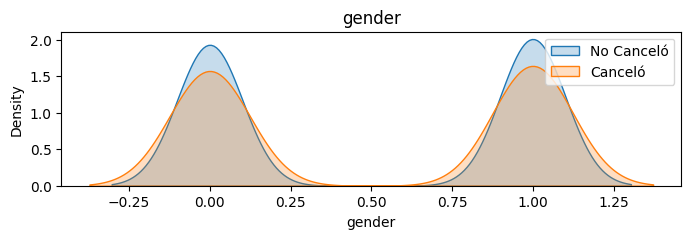

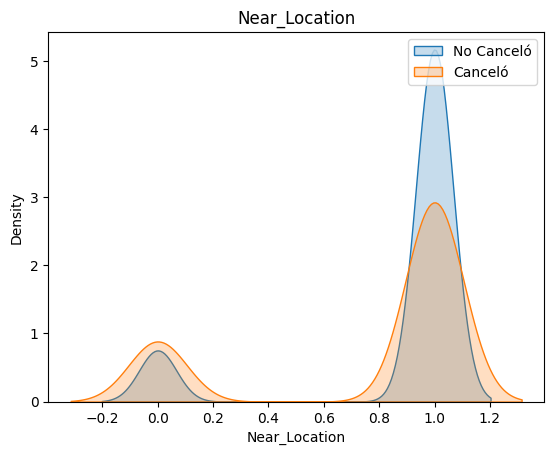

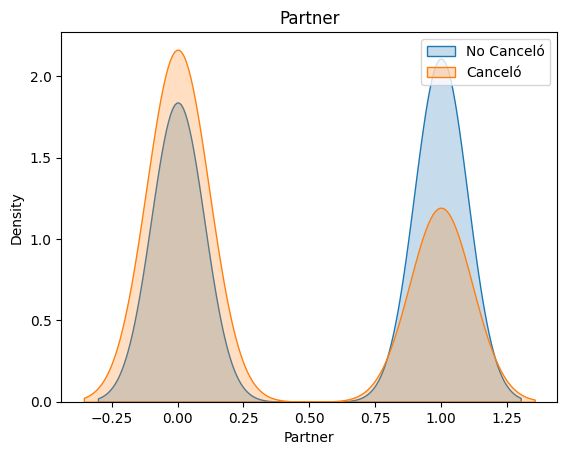

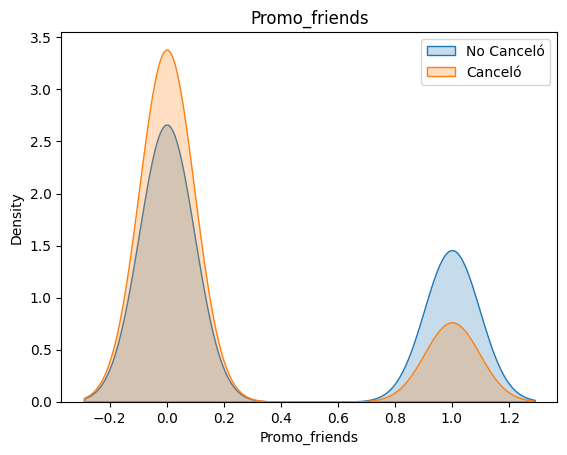

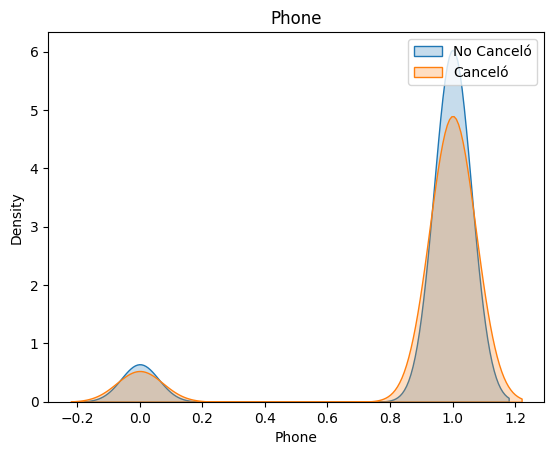

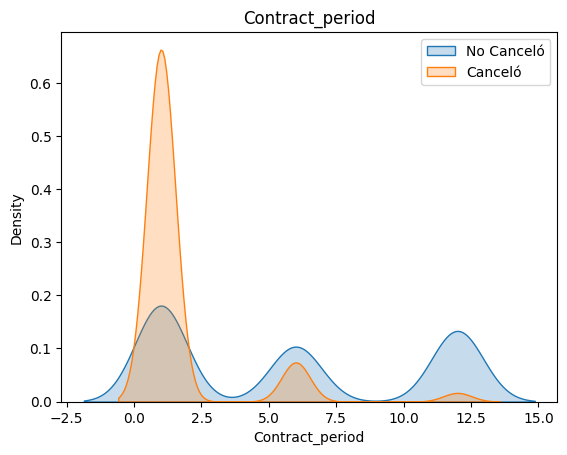

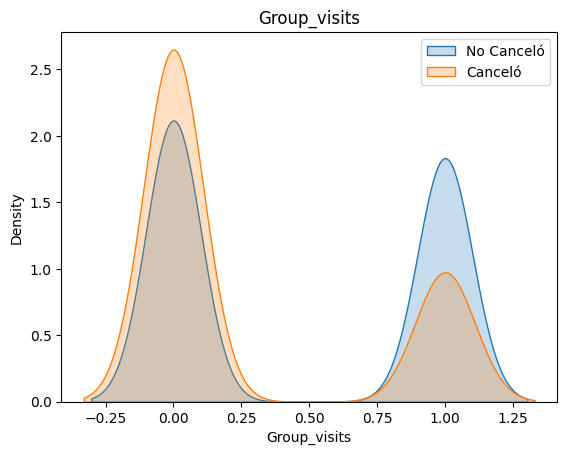

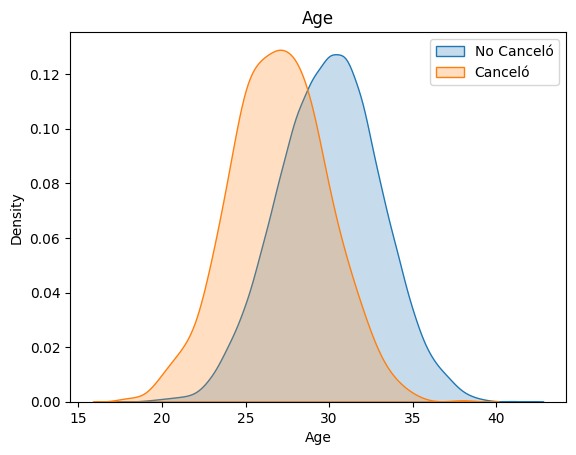

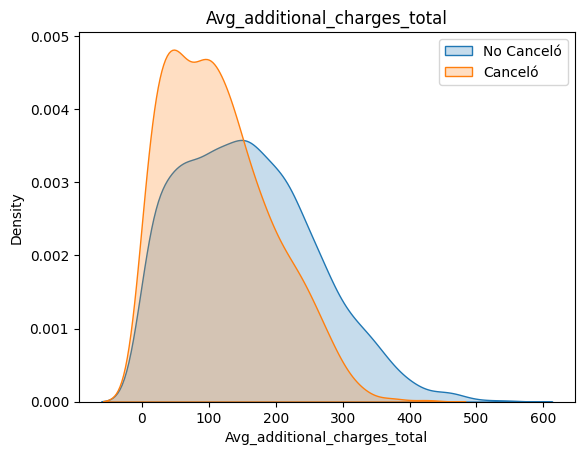

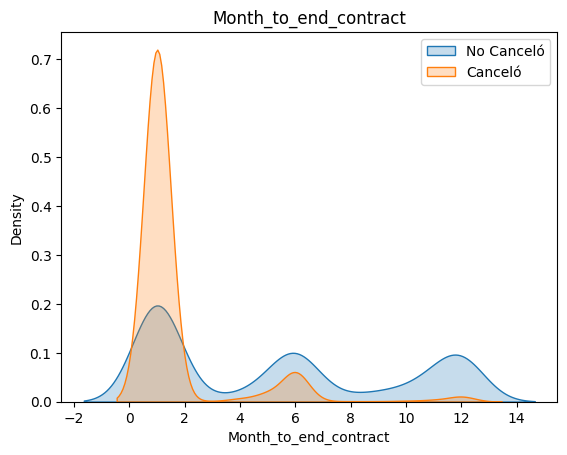

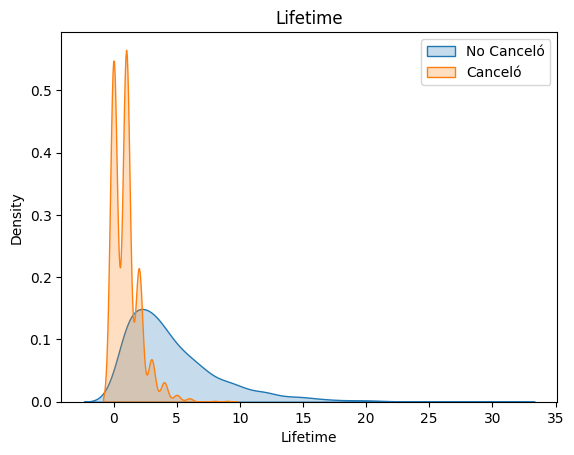

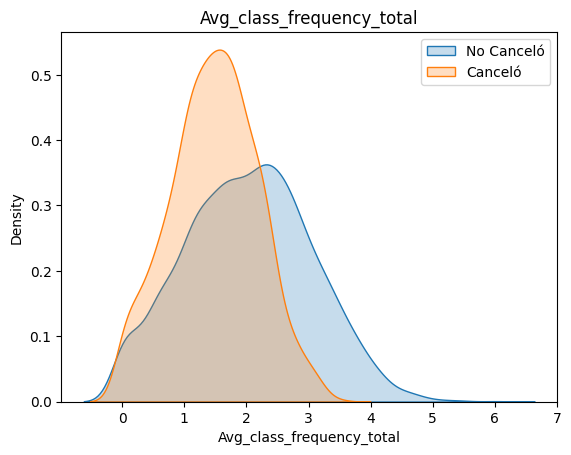

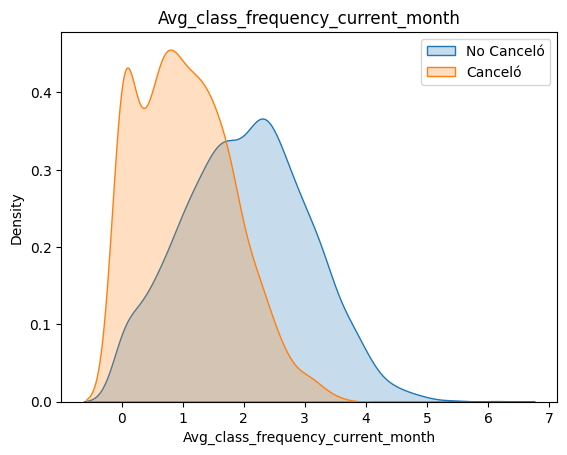

In [58]:
#Distribución de variables según cancelación
plt.figure(figsize=(8, 2))
for column in df.drop(columns=['Churn']).columns:
    sns.kdeplot(df[df['Churn'] == 0][column], label="No Canceló", shade=True)
    sns.kdeplot(df[df['Churn'] == 1][column], label="Canceló", shade=True)
    plt.title(column)
    plt.legend()
    plt.show()

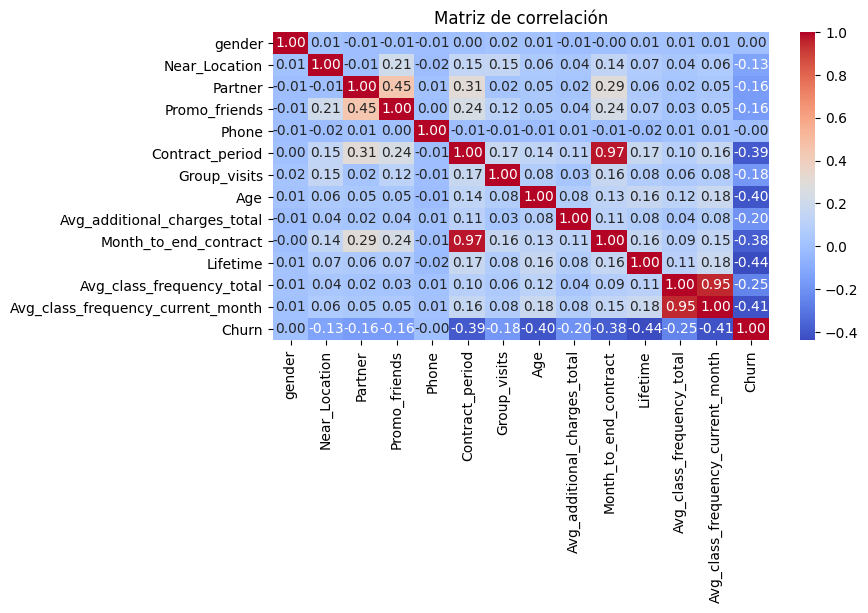

In [59]:
#Matriz de correlación
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención</b> ⚠️ - La matriz de correlación es una herramienta útil para analizar relaciones entre variables numéricas, pero hay algunos aspectos que pueden mejorarse o aclararse en esta implementación.

### **Observaciones y puntos de mejora:**
✔️ **Uso adecuado de la matriz de correlación**: Se han incluido variables clave y la escala de colores facilita la identificación de relaciones.  
✔️ **Correlaciones relevantes con `Churn`**: Se observa que `Contract_period`, `Lifetime`, y `Avg_class_frequency_current_month` tienen correlaciones más significativas con `Churn`, lo cual es un hallazgo valioso.  

### **Puntos a mejorar o aclarar:**
1️⃣ **Confusión entre variables continuas y categóricas**  
   - Algunas variables en la matriz de correlación, como `gender`, `Near_Location`, y `Phone`, parecen ser categóricas en su naturaleza.  
   - El coeficiente de correlación de Pearson (que es lo que se usa en `df.corr()`) **es adecuado solo para variables continuas**.  
   - Para analizar relaciones entre variables categóricas y `Churn`, podrías utilizar **Chi-cuadrado** o **ANOVA** en lugar de correlación de Pearson.  

   **Sugerencia:**  
   - Si `gender` es binaria (0/1), su relación con `Churn` podría evaluarse mejor con una tabla de contingencia y una prueba de independencia:  
     ```python
     from scipy.stats import chi2_contingency
     contingency_table = pd.crosstab(df['gender'], df['Churn'])
     chi2, p, dof, expected = chi2_contingency(contingency_table)
     print(f"Chi-cuadrado: {chi2}, p-valor: {p}")
     ```
   - Para analizar variables categóricas ordinales, una prueba de **Kruskal-Wallis** podría ser más apropiada.

2️⃣ **¿Es correcta la interpretación de las correlaciones?**  
   - La correlación indica **relación lineal** entre variables, pero no implica causalidad.  
   - Valores como `Contract_period (-0.39)` o `Avg_class_frequency_current_month (-0.41)` tienen correlaciones negativas con `Churn`, lo que sugiere que a mayor duración del contrato o frecuencia de asistencia, menor es la probabilidad de cancelación.  
   - Sin embargo, hay valores muy bajos en variables categóricas, lo que podría ser un indicativo de que la correlación de Pearson no es la mejor métrica para ellas.

3️⃣ **Evaluar con otras métricas más apropiadas**  
   - Para evaluar la importancia de las características en relación con `Churn`, puedes utilizar:  
     - **Árboles de decisión o Random Forest** para ver la importancia de las variables en la predicción.  
     - **Coeficientes de regresión logística**, que también ayudan a entender la contribución de cada variable en la probabilidad de cancelación.


### **Conclusión**  
📌 **La matriz de correlación es útil, pero debe interpretarse con precaución**. Algunas variables categóricas pueden no ser adecuadas para este análisis y es mejor evaluarlas con pruebas específicas como Chi-cuadrado o Kruskal-Wallis. Además, para analizar la importancia de las variables en la predicción de `Churn`, puede ser más útil utilizar modelos como árboles de decisión o regresión logística.  

</div>

Conclusión: 
Las variables más influyentes en el Churn parecen ser Age, Lifetime, Contract_period, y Month_to_end_contract. 
La cancelación está fuertemente ligada a la duración del contrato, el tiempo de permanencia en el gimnasio y la frecuencia de visitas.

##  Construir un modelo para predecir la cancelación de usuarios

In [60]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Separar características y variable objetivo
X = df.drop(columns=['Churn'])  # Características
y = df['Churn']  # Variable objetivo

# Dividir en conjuntos de entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Entrenar modelo de regresión logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_valid_scaled)

# Entrenar modelo de bosque aleatorio
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

# Evaluación de los modelos
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

print("Evaluación de modelos:")
evaluate_model(y_valid, y_pred_log, "Regresión Logística")
evaluate_model(y_valid, y_pred_rf, "Bosque Aleatorio")

Evaluación de modelos:
Regresión Logística - Accuracy: 0.9163, Precision: 0.8729, Recall: 0.7822
Bosque Aleatorio - Accuracy: 0.9100, Precision: 0.8495, Recall: 0.7822


La Regresión Logística es el mejor modelo en este caso porque tiene:
Mayor accuracy (clasifica correctamente más casos en general).
Mayor precision (sus predicciones de cancelación son más confiables).
El mismo recall que el Bosque Aleatorio.

## Crear clústeres de usuarios/as

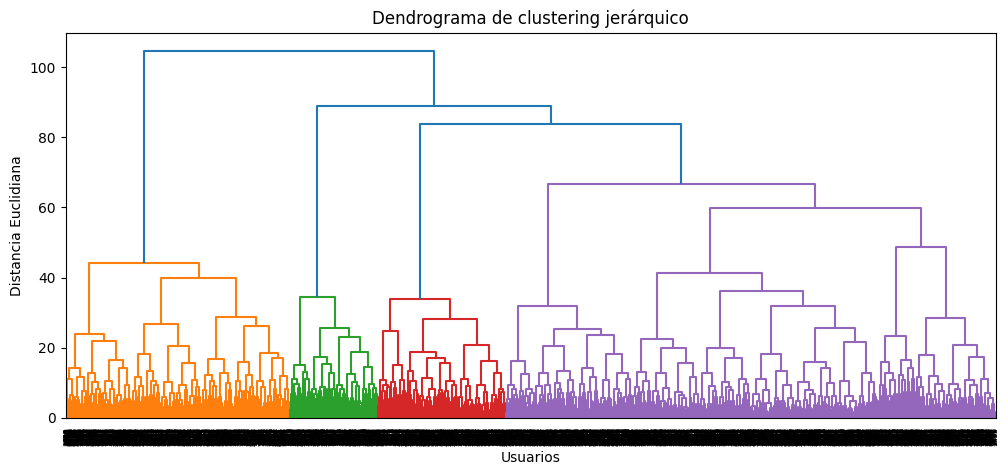


Valores promedio por cluster:
           gender  Near_Location   Partner  Promo_friends  Phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                                       

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Eliminar la columna de cancelación
df_features = df.drop(columns=['Churn'])

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Crear el dendrograma
plt.figure(figsize=(12, 5))
linked = linkage(X_scaled, method='ward')
dendrogram(linked)
plt.title("Dendrograma de clustering jerárquico")
plt.xlabel("Usuarios")
plt.ylabel("Distancia Euclidiana")
plt.show()

# Entrenar modelo K-Means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Ver características promedio por cluster
cluster_means = df.groupby('cluster').mean()
print("\nValores promedio por cluster:")
print(cluster_means)



<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención</b> ⚠️ - Se ha implementado correctamente el clustering jerárquico y el modelo K-Means para segmentar clientes. Sin embargo, hay algunos aspectos que se pueden mejorar:

### **Puntos positivos**:
✔️ **Uso adecuado del dendrograma** - Permite visualizar las relaciones entre los grupos y evaluar el número óptimo de clusters.  
✔️ **Estandarización de datos con `StandardScaler()`** - Es una buena práctica antes de aplicar K-Means para evitar que variables con diferentes escalas afecten la segmentación.  
✔️ **Agrupación y análisis de clusters** - Se han calculado las medias de las características por cluster, lo que facilita la interpretación de cada grupo.

### **Puntos a mejorar**:
1️⃣ **Uso de `print()` para visualizar DataFrames** - No es la mejor práctica en Jupyter Notebooks o en análisis de datos en general. Es mejor utilizar `display()` o `.head()` para una visualización más clara y estructurada.  
   **Sugerencia:**  
   ```python
   display(cluster_means)
   ```
   Esto presentará el DataFrame de una forma más ordenada y fácil de leer.  

2️⃣ **Evaluación de la cantidad óptima de clusters** - Aunque se estableció `n_clusters=5`, no se menciona por qué se eligió este valor.  
   **Sugerencia:**  
   - Usar el método del **codo (Elbow Method)** para confirmar si 5 es un número adecuado.  
   - Calcular el **índice de silueta (`silhouette_score`)** para evaluar la calidad de la segmentación.



📌 **Resumen**: La segmentación de clientes está bien aplicada, pero sería recomendable mejorar la visualización y evaluación de los clusters para validar que el número de segmentos es el adecuado. También es importante evitar `print()` en la visualización de DataFrames.  

</div>

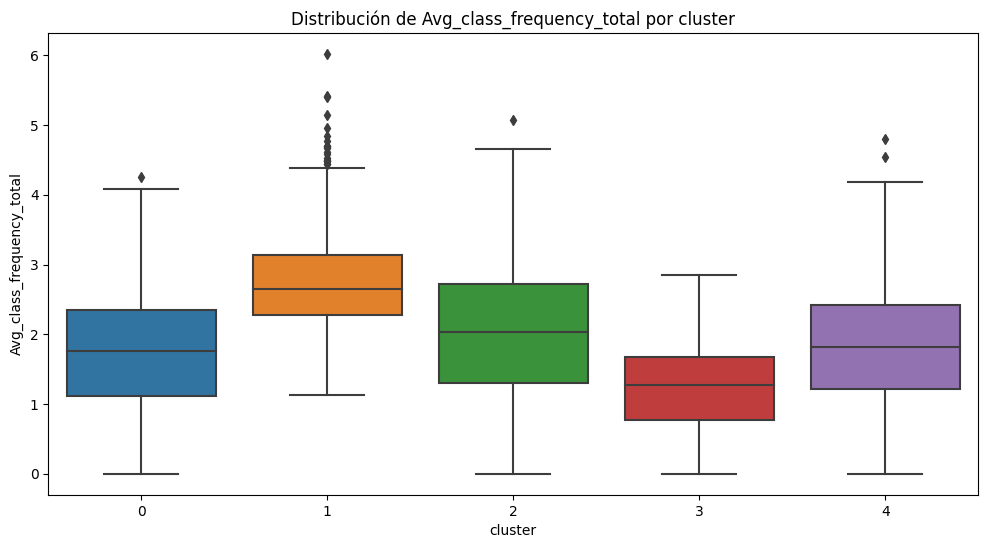

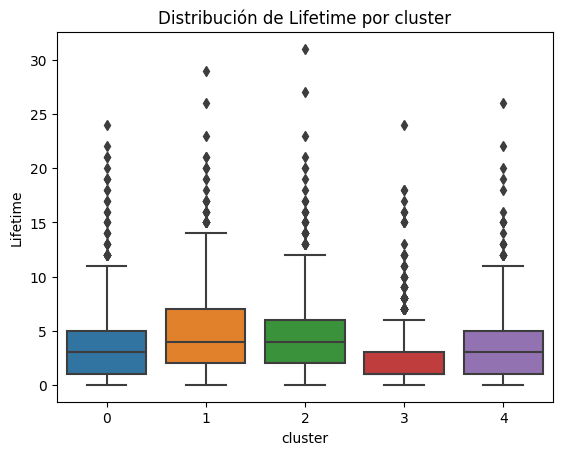

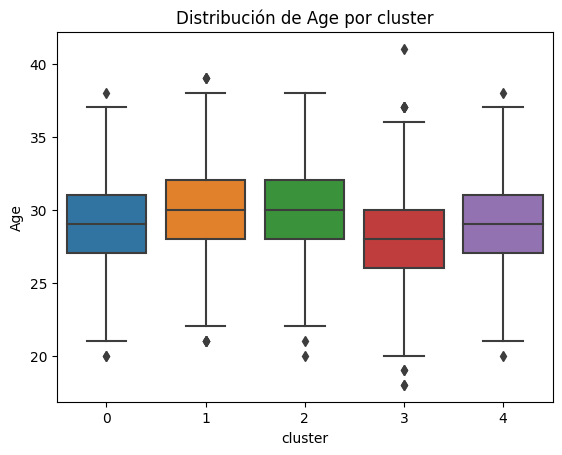

In [62]:
# Graficar distribuciones de algunas características clave
plt.figure(figsize=(12, 6))
for feature in ['Avg_class_frequency_total', 'Lifetime', 'Age']:
    sns.boxplot(x=df['cluster'], y=df[feature])
    plt.title(f"Distribución de {feature} por cluster")
    plt.show()



Cluster 2 parece ser el más estable, con contratos de larga duración y una tasa de abandono muy baja.
Cluster 3 tiene la tasa de abandono más alta, lo que podría indicar la necesidad de estrategias específicas para retener a estos clientes.
Cluster 1 tiene una baja tasa de abandono y características distintivas como bajo uso de promociones de amigos y pocos con pareja.
Cluster 0 y Cluster 4 tienen tasas de abandono moderadas y características mixtas.

In [63]:
# Calcular tasa de cancelación por cluster
churn_rates = df.groupby('cluster')['Churn'].mean()
print("\nTasa de cancelación por cluster:")
print(churn_rates)




Tasa de cancelación por cluster:
cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


Cluster 2 es el más estable y leal, con una tasa de cancelación muy baja.
Cluster 3 requiere atención inmediata debido a su alta tasa de cancelación.
Clusters 0 y 4 tienen tasas de cancelación moderadas y podrían beneficiarse de estrategias de retención adicionales.
Cluster 1 es el más estable y podría servir como un modelo para entender qué características contribuyen a la lealtad del cliente.

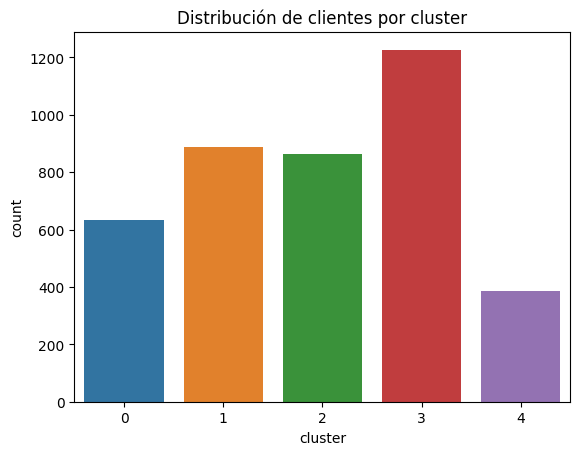

In [64]:
# Visualizar la distribución de clusters
sns.countplot(x=df['cluster'])
plt.title("Distribución de clientes por cluster")
plt.show()

Clusters 0 y 4: Tienen un número significativo de clientes y tasas de cancelación moderadas. Es importante implementar estrategias de retención para estos grupos.
Cluster 1: Aunque puede ser más pequeño, su baja tasa de cancelación lo hace valioso. Las estrategias deberían enfocarse en mantener su lealtad.
Cluster 2: Aunque pequeño, es muy estable y leal. Podría ser un grupo objetivo para programas de fidelización y referidos.
Cluster 3: Este cluster es crítico debido a su alta tasa de cancelación y posiblemente su tamaño. Requiere atención inmediata y estrategias específicas para reducir el abandono.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

✅ **Análisis bien hecho.** Has identificado qué segmentos de clientes son más leales y cuáles requieren estrategias de retención.  

📌 **Sugerencia**:  
1️⃣ Complementar este análisis con `boxplots` de características clave para visualizar diferencias entre clusters.  
2️⃣ Proponer estrategias específicas para los clientes con mayor riesgo de cancelación.  

</div>

## Recomendaciones de Marketing para la retención de clientes y reducir la tasa de cancelación


Segmentación y Personalización:
Principio: Adaptar las estrategias de marketing a las necesidades específicas de cada grupo de clientes.
Implementación:
Crear campañas de marketing personalizadas basadas en el comportamiento y preferencias de cada cluster.
Ofrecer descuentos y promociones específicas para clusters con alta tasa de cancelación.

Comunicación Proactiva:
Principio: Mantener una comunicación constante y relevante con los clientes.
Implementación:
Enviar recordatorios y ofertas especiales a clientes que están cerca del final de su contrato.
Utilizar múltiples canales de comunicación (email, SMS, app) según las preferencias de los clientes.

Programas de Fidelización:
Principio: Incentivar la lealtad a través de recompensas y beneficios exclusivos.
Implementación:
Implementar programas de puntos o recompensas para clientes leales.
Ofrecer beneficios adicionales, como acceso exclusivo a eventos o servicios premium.

Mejora Continua del Servicio:
Principio: Mejorar continuamente la experiencia del cliente para aumentar la satisfacción y retención.
Implementación:
Realizar encuestas de satisfacción y feedback regularmente.
Implementar mejoras basadas en el feedback recibido, como ajustes en los horarios o servicios adicionales.


<div class="alert alert-block alert-success">

**¡Gran trabajo!** Tu análisis es sólido y bien estructurado. Has abordado todos los aspectos clave del churn y la retención de clientes en el gimnasio.  

🔹 **Puntos fuertes**:  
✅ Análisis exploratorio completo.  
✅ Visualizaciones bien diseñadas.  
✅ Modelado predictivo con buena interpretación.  
✅ Uso correcto de clustering para segmentar clientes.  
✅ Recomendaciones de negocio bien argumentadas.  

🚀 **Áreas de mejora**:  
📌 Considerar más modelos y optimización con `GridSearchCV`.  
📌 Evaluar los clusters con `silhouette_score`.  

**¡Sigue así! Tu análisis es de gran calidad y estás mejorando mucho. 🚀💡**  

</div>